In [2]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 65 kB 3.5 MB/s 
     |████████████████████████████████| 49 kB 5.9 MB/s 
     |████████████████████████████████| 45 kB 3.6 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6641790 sha256=016e544d06374cb86c1c3d0b8e9936d9633aea0d31278be7fc83462792f914d5
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
df = pd.read_csv("/content/weekly_time_series.csv")
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,twitter_sentiment,news_sentiment
0,2011-11-28,6.514,6.798,6.396,6.660,9165000,0.429400,0.00000
1,2011-12-05,6.706,7.000,5.922,6.208,36657500,0.224062,-0.02580
2,2011-12-12,6.088,6.186,5.596,5.600,23233500,0.224062,0.00000
3,2011-12-19,5.618,5.700,5.206,5.580,25683000,0.224062,0.10115
4,2011-12-26,5.532,5.868,5.528,5.712,10903500,0.493935,0.20230


In [4]:
df["y"] = df["Close"]

In [5]:
df["add1"] = df["twitter_sentiment"]
df["add2"] = df["news_sentiment"]
df["ds"] = df["Date"]

In [6]:
#df_train = df.loc[df["Date"]<"2022-1-1"]
#df_test  = df.loc[df["Date"]>="2022-1-1"]

df_train = df[:int(0.9*(len(df)))]
df_test = df[int(0.9*(len(df))):]



In [7]:
from fbprophet import Prophet
m = Prophet()
m.add_regressor('add1')
m.add_regressor('add2')
m.fit(df_train)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
#forecast = m.predict(df_test.drop(columns="y"))

forecast = m.predict(df_test)

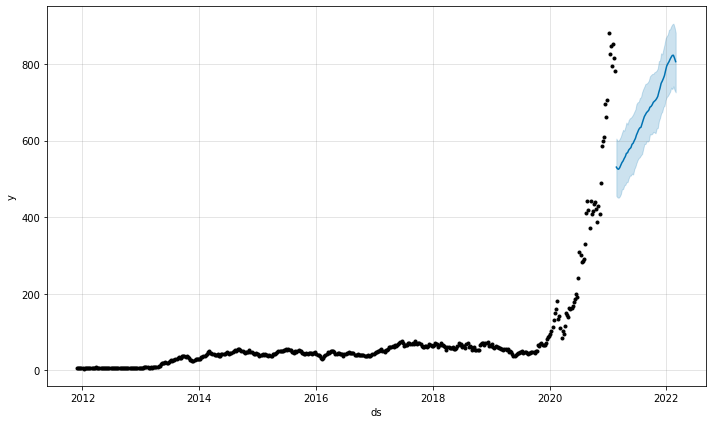

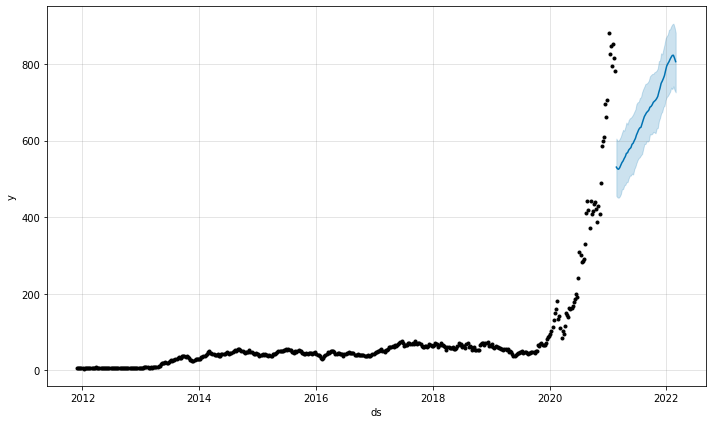

In [9]:
m.plot(forecast)

In [10]:
df.corr()

,Open,High,Low,Close,Volume,twitter_sentiment,news_sentiment,y,add1,add2
Open,1.000000,0.998366,0.998080,0.995858,0.034001,-0.058916,-0.021487,0.995858,-0.058916,-0.021487
High,0.998366,1.000000,0.997859,0.998331,0.048457,-0.059259,-0.022586,0.998331,-0.059259,-0.022586
Low,0.998080,0.997859,1.000000,0.998072,0.027354,-0.057278,-0.018603,0.998072,-0.057278,-0.018603
Close,0.995858,0.998331,0.998072,1.000000,0.040460,-0.057169,-0.019761,1.000000,-0.057169,-0.019761
Volume,0.034001,0.048457,0.027354,0.040460,1.000000,-0.073334,-0.138548,0.040460,-0.073334,-0.138548
twitter_sentiment,-0.058916,-0.059259,-0.057278,-0.057169,-0.073334,1.000000,0.015510,-0.057169,1.000000,0.015510
news_sentiment,-0.021487,-0.022586,-0.018603,-0.019761,-0.138548,0.015510,1.000000,-0.019761,0.015510,1.000000
y,0.995858,0.998331,0.998072,1.000000,0.040460,-0.057169,-0.019761,1.000000,-0.057169,-0.019761
add1,-0.058916,-0.059259,-0.057278,-0.057169,-0.073334,1.000000,0.015510,-0.057169,1.000000,0.015510
add2,-0.021487,-0.022586,-0.018603,-0.019761,-0.138548,0.015510,1.000000,-0.019761,0.015510,1.000000


In [11]:
df

,Date,Open,High,Low,Close,Volume,twitter_sentiment,news_sentiment,y,add1,add2,ds
0,2011-11-28,6.514000,6.798000,6.396000,6.660000,9165000,0.429400,0.000000,6.660000,0.429400,0.000000,2011-11-28
1,2011-12-05,6.706000,7.000000,5.922000,6.208000,36657500,0.224062,-0.025800,6.208000,0.224062,-0.025800,2011-12-05
2,2011-12-12,6.088000,6.186000,5.596000,5.600000,23233500,0.224062,0.000000,5.600000,0.224062,0.000000,2011-12-12
3,2011-12-19,5.618000,5.700000,5.206000,5.580000,25683000,0.224062,0.101150,5.580000,0.224062,0.101150,2011-12-19
4,2011-12-26,5.532000,5.868000,5.528000,5.712000,10903500,0.493935,0.202300,5.712000,0.493935,0.202300,2011-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...
531,2022-01-31,872.710022,943.700012,862.049988,923.320007,132282700,0.112223,0.108138,923.320007,0.112223,0.108138,2022-01-31
532,2022-02-07,923.789978,947.770020,850.700012,860.000000,103251900,0.029668,0.048803,860.000000,0.029668,0.048803,2022-02-07
533,2022-02-14,861.570007,926.429993,837.609985,856.979980,100005700,0.078330,-0.205567,856.979980,0.078330,-0.205567,2022-02-14
534,2022-02-21,834.130005,856.729980,700.000000,809.869995,129978300,0.169567,-0.158050,809.869995,0.169567,-0.158050,2022-02-21


In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-22,525.906248,455.346457,604.942086,525.906248,525.906248,-0.084254,-0.084254,-0.084254,-0.971095,...,-1.055349,-1.055349,-1.055349,5.707289,5.707289,5.707289,0.0,0.0,0.0,530.558189
1,2021-03-01,531.266999,451.427879,599.680848,531.266999,531.266999,-0.149718,-0.149718,-0.149718,1.481298,...,1.331579,1.331579,1.331579,-6.551595,-6.551595,-6.551595,0.0,0.0,0.0,526.046984
2,2021-03-08,536.627750,450.596962,599.317795,536.627750,536.627750,-0.080693,-0.080693,-0.080693,0.954234,...,0.873541,0.873541,0.873541,-12.508982,-12.508982,-12.508982,0.0,0.0,0.0,524.992308
3,2021-03-15,541.988500,453.790000,604.205816,541.988500,541.994873,-0.201484,-0.201484,-0.201484,-0.454043,...,-0.655527,-0.655527,-0.655527,-12.302683,-12.302683,-12.302683,0.0,0.0,0.0,529.030290
4,2021-03-22,547.349251,459.990631,610.241167,547.276875,547.413285,-0.062642,-0.062642,-0.062642,-1.086300,...,-1.148942,-1.148942,-1.148942,-10.297769,-10.297769,-10.297769,0.0,0.0,0.0,535.902540
5,2021-03-29,552.710001,472.718504,619.715939,552.510797,552.913872,-0.128933,-0.128933,-0.128933,-0.151503,...,-0.280435,-0.280435,-0.280435,-9.993161,-9.993161,-9.993161,0.0,0.0,0.0,542.436405
6,2021-04-05,558.070752,473.049973,627.781383,557.661732,558.439784,0.034301,0.034301,0.034301,-0.485976,...,-0.451676,-0.451676,-0.451676,-10.990651,-10.990651,-10.990651,0.0,0.0,0.0,546.628425
7,2021-04-12,563.431502,482.238868,625.428129,562.814089,563.938385,-0.297181,-0.297181,-0.297181,0.845982,...,0.548801,0.548801,0.548801,-10.990123,-10.990123,-10.990123,0.0,0.0,0.0,552.990180
8,2021-04-19,568.792253,484.308115,634.544784,568.002278,569.476177,0.034735,0.034735,0.034735,-1.040561,...,-1.005826,-1.005826,-1.005826,-9.571557,-9.571557,-9.571557,0.0,0.0,0.0,558.214869
9,2021-04-26,574.153004,490.766767,646.901077,573.115135,575.136451,0.103228,0.103228,0.103228,1.111637,...,1.214865,1.214865,1.214865,-8.819936,-8.819936,-8.819936,0.0,0.0,0.0,566.547932


In [14]:
len(df_test)

54

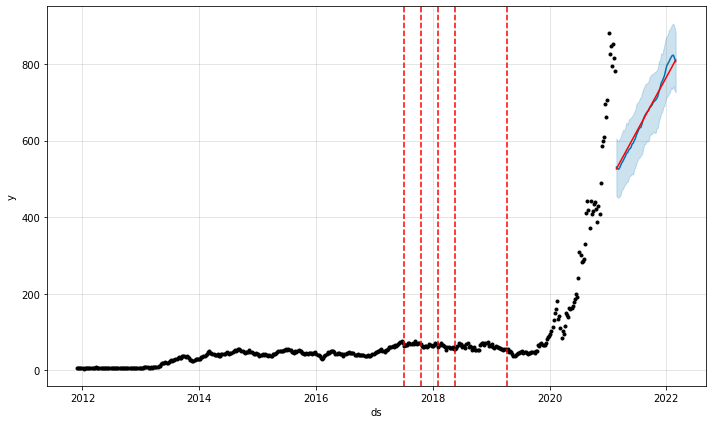

In [15]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


In [16]:
m.changepoints


15    2012-03-12
31    2012-07-02
46    2012-10-15
61    2013-01-28
77    2013-05-20
92    2013-09-02
108   2013-12-23
123   2014-04-07
138   2014-07-21
154   2014-11-10
169   2015-02-23
184   2015-06-08
200   2015-09-28
215   2016-01-11
230   2016-04-25
246   2016-08-15
261   2016-11-28
276   2017-03-13
292   2017-07-03
307   2017-10-16
323   2018-02-05
338   2018-05-21
353   2018-09-03
369   2018-12-24
384   2019-04-08
Name: ds, dtype: datetime64[ns]

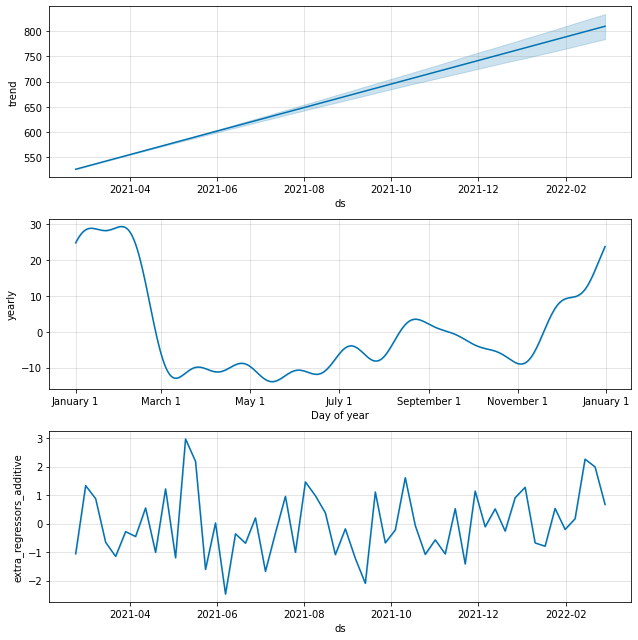

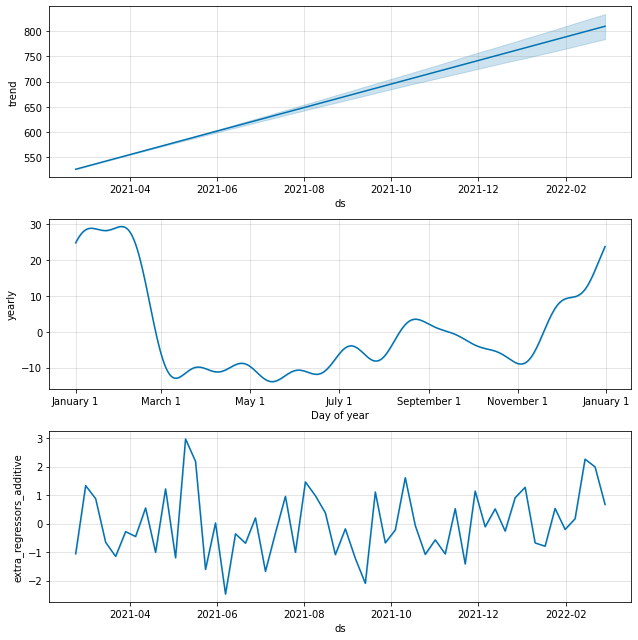

In [17]:
m.plot_components(forecast)

In [18]:
metric_df = forecast.set_index('ds')[['yhat']].join(df_test.set_index('ds').y).reset_index()

In [19]:
metric_df.dropna(inplace=True)

In [20]:
metric_df.tail()

,ds,yhat,y
49,2022-01-31,817.635323,923.320007
50,2022-02-07,822.257153,860.000000
51,2022-02-14,822.570067,856.979980
52,2022-02-21,814.863155,809.869995
53,2022-02-28,805.965971,838.289978


In [21]:
metric_df

,ds,yhat,y
0,2021-02-22,530.558189,675.500000
1,2021-03-01,526.046984,597.950012
2,2021-03-08,524.992308,693.729980
3,2021-03-15,529.030290,654.869995
4,2021-03-22,535.902540,618.710022
5,2021-03-29,542.436405,661.750000
6,2021-04-05,546.628425,677.020020
7,2021-04-12,552.990180,739.780029
8,2021-04-19,558.214869,729.400024
9,2021-04-26,566.547932,709.440002


In [22]:

#from prophet.diagnostics import performance_metrics
#df_p = performance_metrics()
import numpy as np
def mape_vectorized(a, b): 
    mask = a != 0
    return (np.fabs(a[mask] - b[mask])/a[mask]).mean()

mape_vectorized(metric_df.y, metric_df.yhat)


0.14517800248333168

In [25]:
df_test["ds"]

482   2021-02-22
483   2021-03-01
484   2021-03-08
485   2021-03-15
486   2021-03-22
487   2021-03-29
488   2021-04-05
489   2021-04-12
490   2021-04-19
491   2021-04-26
492   2021-05-03
493   2021-05-10
494   2021-05-17
495   2021-05-24
496   2021-05-31
497   2021-06-07
498   2021-06-14
499   2021-06-21
500   2021-06-28
501   2021-07-05
502   2021-07-12
503   2021-07-19
504   2021-07-26
505   2021-08-02
506   2021-08-09
507   2021-08-16
508   2021-08-23
509   2021-08-30
510   2021-09-06
511   2021-09-13
512   2021-09-20
513   2021-09-27
514   2021-10-04
515   2021-10-11
516   2021-10-18
517   2021-10-25
518   2021-11-01
519   2021-11-08
520   2021-11-15
521   2021-11-22
522   2021-11-29
523   2021-12-06
524   2021-12-13
525   2021-12-20
526   2021-12-27
527   2022-01-03
528   2022-01-10
529   2022-01-17
530   2022-01-24
531   2022-01-31
532   2022-02-07
533   2022-02-14
534   2022-02-21
535   2022-02-28
Name: ds, dtype: datetime64[ns]

In [23]:
forecast.set_index('ds')[['yhat']].join(df_test.set_index('ds')[["y"]]).reset_index()

,ds,yhat,y
0,2021-02-22,530.558189,675.500000
1,2021-03-01,526.046984,597.950012
2,2021-03-08,524.992308,693.729980
3,2021-03-15,529.030290,654.869995
4,2021-03-22,535.902540,618.710022
5,2021-03-29,542.436405,661.750000
6,2021-04-05,546.628425,677.020020
7,2021-04-12,552.990180,739.780029
8,2021-04-19,558.214869,729.400024
9,2021-04-26,566.547932,709.440002


In [24]:
print(forecast["ds"][1])

2021-03-01 00:00:00


In [25]:
df_test["ds"]

482   2021-02-22
483   2021-03-01
484   2021-03-08
485   2021-03-15
486   2021-03-22
487   2021-03-29
488   2021-04-05
489   2021-04-12
490   2021-04-19
491   2021-04-26
492   2021-05-03
493   2021-05-10
494   2021-05-17
495   2021-05-24
496   2021-05-31
497   2021-06-07
498   2021-06-14
499   2021-06-21
500   2021-06-28
501   2021-07-05
502   2021-07-12
503   2021-07-19
504   2021-07-26
505   2021-08-02
506   2021-08-09
507   2021-08-16
508   2021-08-23
509   2021-08-30
510   2021-09-06
511   2021-09-13
512   2021-09-20
513   2021-09-27
514   2021-10-04
515   2021-10-11
516   2021-10-18
517   2021-10-25
518   2021-11-01
519   2021-11-08
520   2021-11-15
521   2021-11-22
522   2021-11-29
523   2021-12-06
524   2021-12-13
525   2021-12-20
526   2021-12-27
527   2022-01-03
528   2022-01-10
529   2022-01-17
530   2022-01-24
531   2022-01-31
532   2022-02-07
533   2022-02-14
534   2022-02-21
535   2022-02-28
Name: ds, dtype: datetime64[ns]

In [137]:
df_test

,Date,Open,High,Low,Close,Volume,twitter_sentiment,news_sentiment,y,add1,add2,ds
482,2021-02-22,762.640015,768.500000,619.000000,675.500000,220756700,0.119187,0.215850,675.500000,0.119187,0.215850,2021-02-22
483,2021-03-01,690.109985,721.109985,539.489990,597.950012,236392400,0.064279,-0.091467,597.950012,0.064279,-0.091467,2021-03-01
484,2021-03-08,600.549988,717.849976,558.789978,693.729980,249753700,0.122174,-0.025419,693.729980,0.122174,-0.025419,2021-03-08
485,2021-03-15,694.090027,713.179993,624.619995,654.869995,178022600,0.020861,0.151057,654.869995,0.020861,0.151057,2021-03-15
486,2021-03-22,684.590027,699.619995,599.890015,618.710022,176877000,0.137314,0.230287,618.710022,0.137314,0.230287,2021-03-22
487,2021-03-29,615.640015,692.419983,591.010010,661.750000,136705100,0.081713,0.113144,661.750000,0.081713,0.113144,2021-03-29
488,2021-04-05,707.710022,708.159973,667.840027,677.020020,141785400,0.218624,0.155058,677.020020,0.218624,0.155058,2021-04-05
489,2021-04-12,685.700012,780.789978,682.090027,739.780029,178634300,-0.059405,-0.011853,739.780029,-0.059405,-0.011853,2021-04-12
490,2021-04-19,719.599976,753.770020,691.799988,729.400024,170471000,0.218988,0.224555,729.400024,0.218988,0.224555,2021-04-19
491,2021-04-26,741.000000,749.299988,666.140015,709.440002,152350600,0.276437,-0.045143,709.440002,0.276437,-0.045143,2021-04-26


In [26]:
import matplotlib.pyplot as plt

import seaborn as sns

In [27]:
forecast["y"] = forecast["yhat"]



In [28]:
df_actual = df_test.reset_index(drop=True)
df_actual = df_actual.set_index("ds")
forecast_to_plot = forecast.set_index("ds")

In [29]:
m_full = m.predict(df)

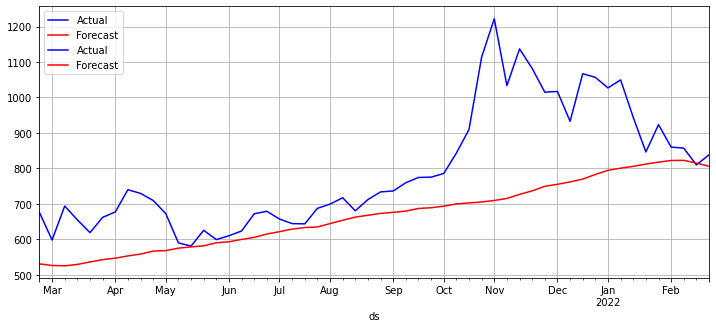

In [30]:
plt.figure(figsize=(12,5))
plt.xlabel('Stock Price forecast')

ax1 = df_actual.y.plot(color='blue', grid=True, label='Actual')
ax2 = forecast_to_plot.yhat.plot(color='red', grid=True, label='Forecast')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


In [31]:
df_actual_full = df.set_index("ds")
forecast_to_plot_full = m_full.set_index("ds")

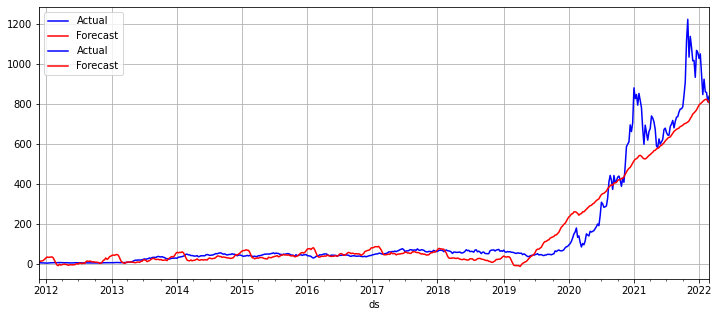

In [32]:
plt.figure(figsize=(12,5))
plt.xlabel('Stock Price forecast')

ax1 = df_actual_full.y.plot(color='blue', grid=True, label='Actual')
ax2 = forecast_to_plot_full.yhat.plot(color='red', grid=True, label='Forecast')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


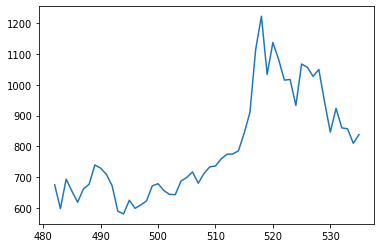

In [33]:
plt.plot(df_test.y)

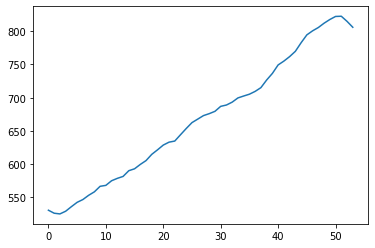

In [34]:
plt.plot(forecast.yhat)

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

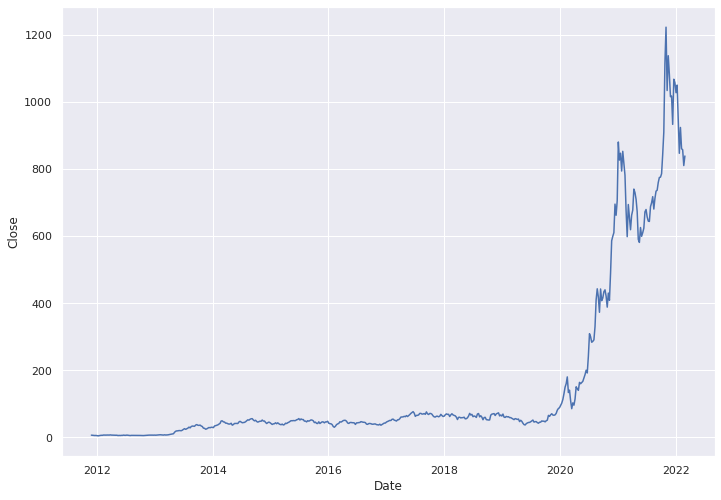

In [36]:
sns.lineplot(x=df["Date"], y=df["Close"])

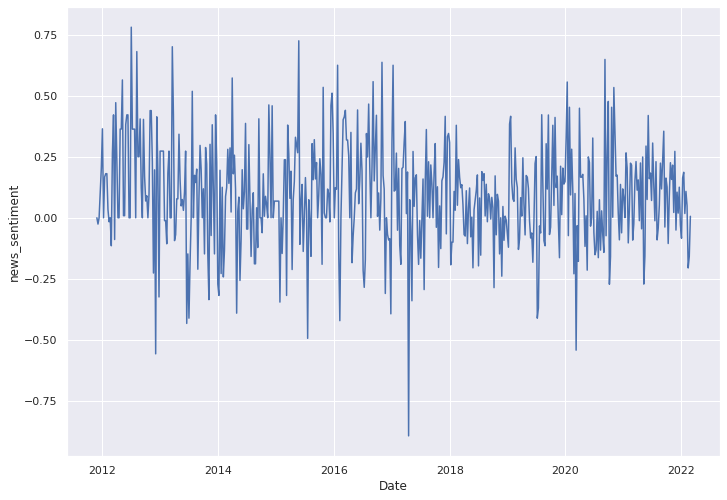

In [37]:
sns.lineplot(x=df["Date"], y=df["news_sentiment"])

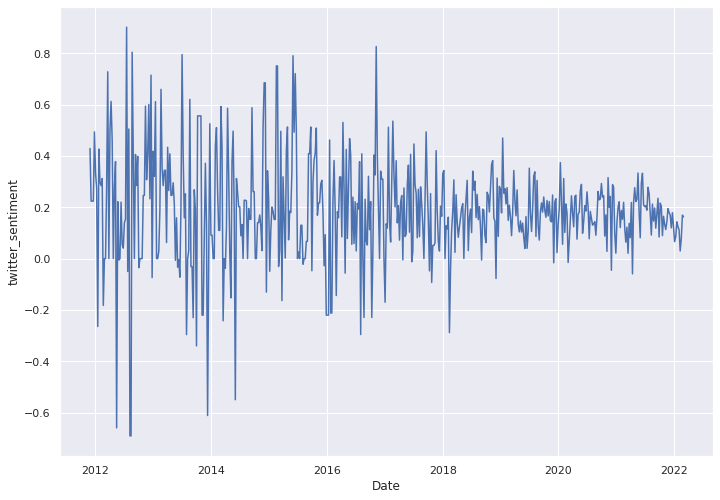

In [38]:
sns.lineplot(x=df["Date"], y=df["twitter_sentiment"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


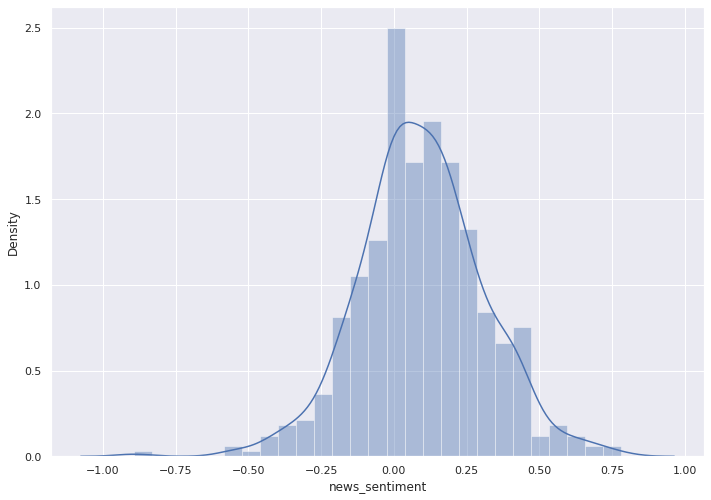

In [40]:
sns.distplot(df["news_sentiment"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


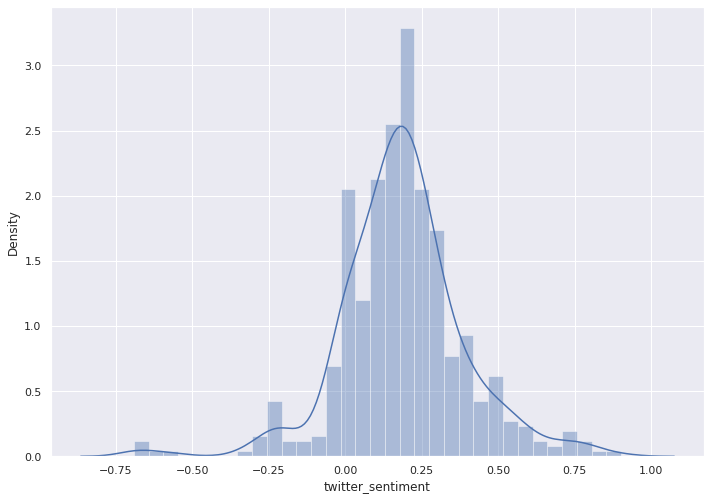

In [41]:
sns.distplot(df["twitter_sentiment"])

In [42]:
df["news_is_positive"] = df["news_sentiment"].apply(lambda x: True if x>0 else False)
df["twitter_is_positive"] = df["twitter_sentiment"].apply(lambda x: True if x>0 else False)

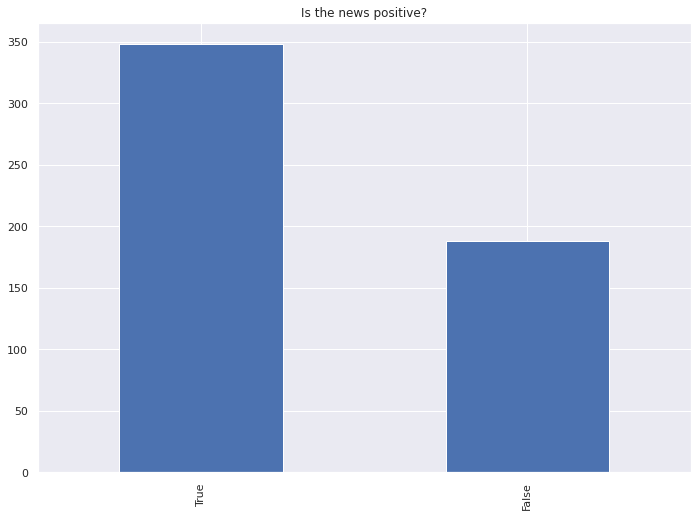

In [43]:
df["news_is_positive"].value_counts().plot.bar(title='Is the news positive?')

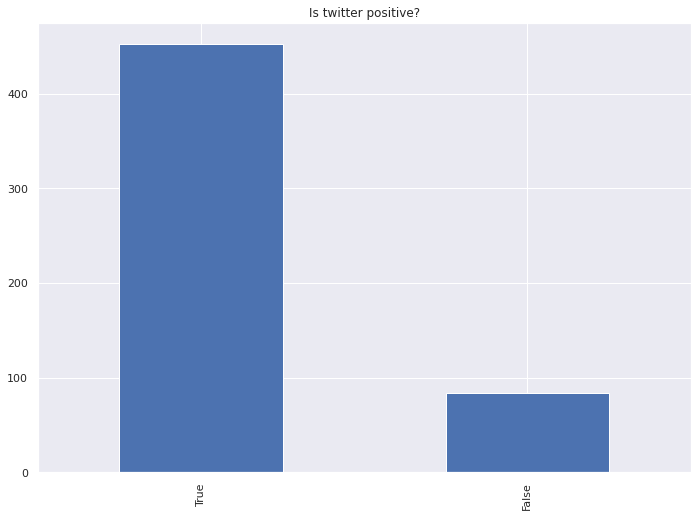

In [44]:
df["twitter_is_positive"].value_counts().plot.bar(title='Is twitter positive?')

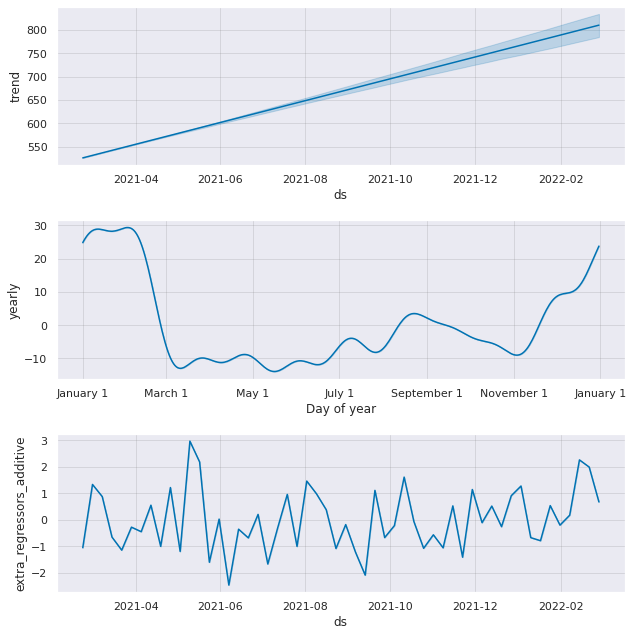

In [45]:
# Python
fig = m.plot_components(forecast)

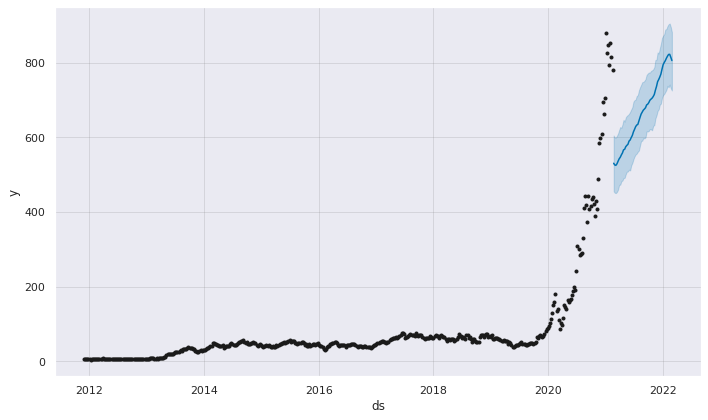

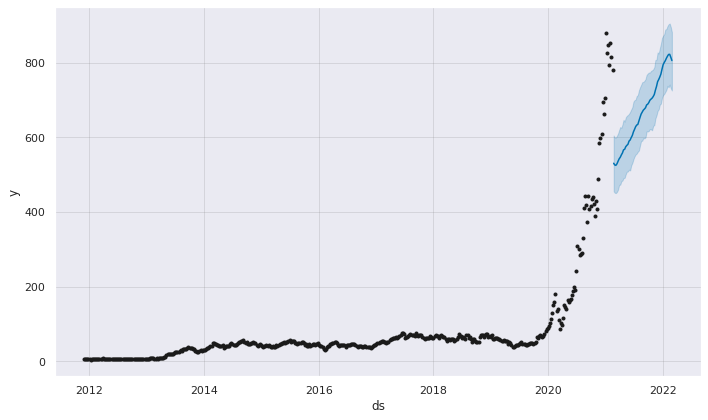

In [46]:
m.plot(forecast)

In [47]:
daily_df = pd.read_csv('stock_price_and_sentiment.csv')

In [48]:
daily_df

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score
0,2011-12-01,6.514000,6.798000,6.396000,6.520000,6.520000,5151000,0.429400
1,2011-12-02,6.566000,6.738000,6.480000,6.660000,6.660000,4014000,0.421168
2,2011-12-05,6.706000,7.000000,6.686000,6.884000,6.884000,5800500,0.412937
3,2011-12-06,6.840000,6.996000,6.806000,6.974000,6.974000,4759000,0.404705
4,2011-12-07,6.926000,6.978000,6.760000,6.838000,6.838000,3371500,0.396473
...,...,...,...,...,...,...,...,...
2576,2022-02-28,815.010010,876.859985,814.710022,870.429993,870.429993,33002300,0.365336
2577,2022-03-01,869.679993,889.880005,853.780029,864.369995,864.369995,24922300,0.525900
2578,2022-03-02,872.130005,886.479980,844.270020,879.890015,879.890015,24881100,0.044540
2579,2022-03-03,878.770020,886.440002,832.599976,839.289978,839.289978,20541200,0.075413


In [49]:
daily_df['Date'] = pd.to_datetime(daily_df['Date'])
daily_df["ds"] = daily_df["Date"]
daily_df["y"] = daily_df["Close"]


In [50]:
train = daily_df[:int(0.9*(len(daily_df)))]
test = daily_df[int(0.9*(len(daily_df))):]


In [51]:
m_daily = Prophet()
#m.add_regressor('add1')
#m.add_regressor('add2')
m_daily.fit(train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
forecast_daily = m_daily.predict(test)

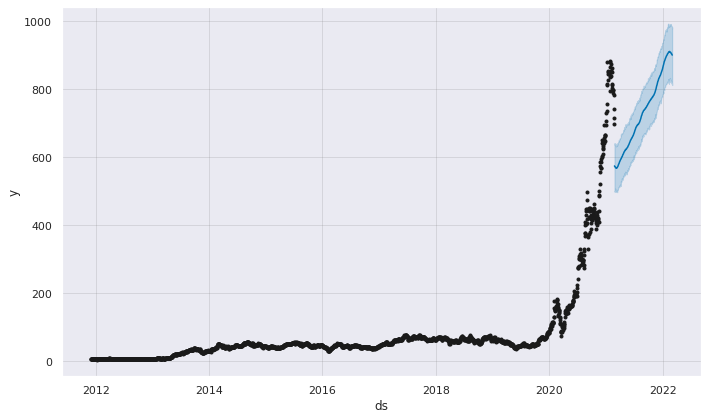

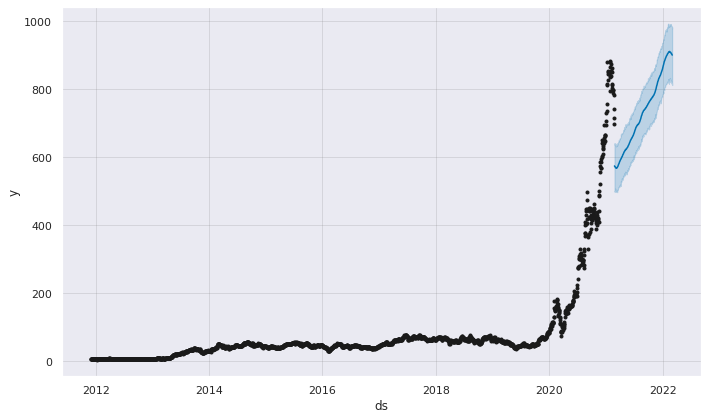

In [53]:
m_daily.plot(forecast_daily)

In [54]:
m_full_daily = m_daily.predict(daily_df)

In [55]:
df_actual_full_daily = daily_df.set_index("ds")
forecast_to_plot_full_daily = m_full_daily.set_index("ds")

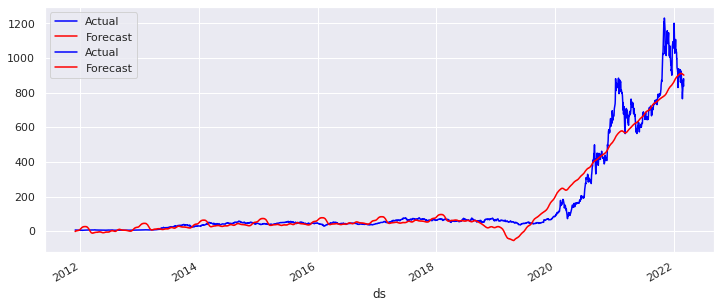

In [56]:
plt.figure(figsize=(12,5))
plt.xlabel('Stock Price forecast')

ax1 = df_actual_full_daily.y.plot(color='blue', grid=True, label='Actual')
ax2 = forecast_to_plot_full_daily.yhat.plot(color='red', grid=True, label='Forecast')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


In [57]:
test_daily = test.set_index("ds")
forecast_to_plot_test = forecast_daily.set_index("ds")

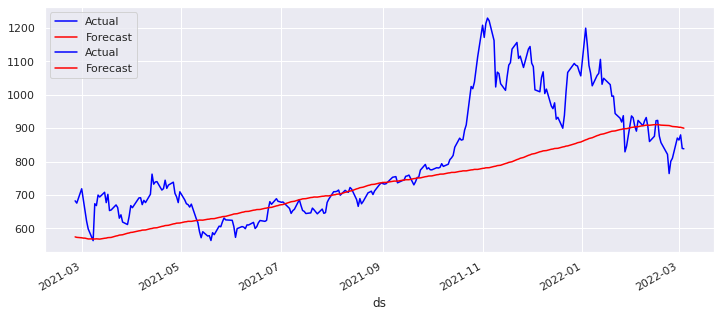

In [58]:
plt.figure(figsize=(12,5))
plt.xlabel('Stock Price forecast')

ax1 = test_daily.y.plot(color='blue', grid=True, label='Actual')
ax2 = forecast_to_plot_test.yhat.plot(color='red', grid=True, label='Forecast')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()


In [59]:
metric_df_daily = forecast_daily.set_index('ds')[['yhat']].join(test.set_index('ds').y).reset_index()

In [60]:
metric_df_daily

,ds,yhat,y
0,2021-02-25,574.201857,682.219971
1,2021-02-26,572.839512,675.500000
2,2021-03-01,571.544309,718.429993
3,2021-03-02,570.600973,686.440002
4,2021-03-03,570.487506,653.200012
...,...,...,...
254,2022-02-28,903.806875,870.429993
255,2022-03-01,902.815952,864.369995
256,2022-03-02,902.636428,879.890015
257,2022-03-03,901.246317,839.289978


In [61]:
mape_vectorized(metric_df_daily['y'], metric_df_daily['yhat'])

0.10259543483652477

In [62]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(metric_df_daily.y, metric_df_daily.yhat, squared=False)

rmse

135.39233103290806

In [63]:
mean_squared_error(metric_df.y, metric_df.yhat, squared=False)

173.86582226975892

In [68]:
diff_df = metric_df_daily.diff()
diff_df = diff_df.iloc[1:]

In [69]:
rmse = mean_squared_error(diff_df.y, diff_df.yhat, squared=False)
rmse


30.778169406183054

In [71]:
mape_vectorized(diff_df.yhat, diff_df.y)

7.40584817236508

In [69]:
metric_df_daily['residual'] = metric_df_daily['yhat'] - metric_df_daily['y']

In [75]:
metric_df_daily['residual']

0     -108.018114
1     -102.660488
2     -146.885684
3     -115.839029
4      -82.712506
          ...    
254     33.376882
255     38.445957
256     22.746413
257     61.956339
258     61.766531
Name: residual, Length: 259, dtype: float64

In [64]:
metric_df['residual'] = metric_df['yhat'] - metric_df['y']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


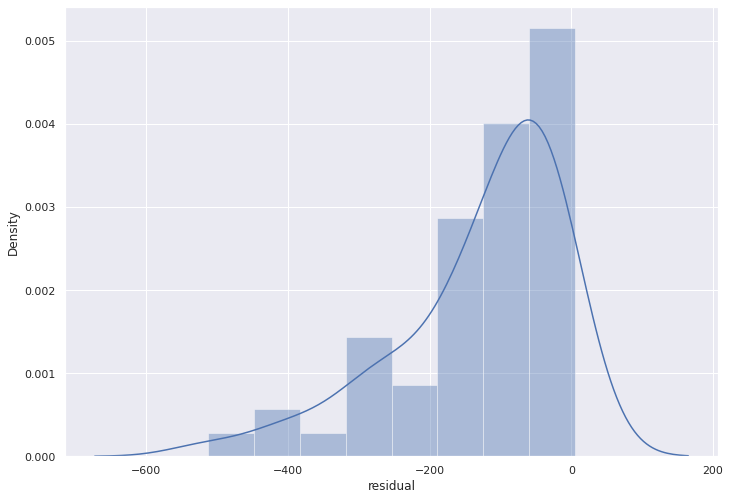

In [65]:
sns.distplot(metric_df['residual'])

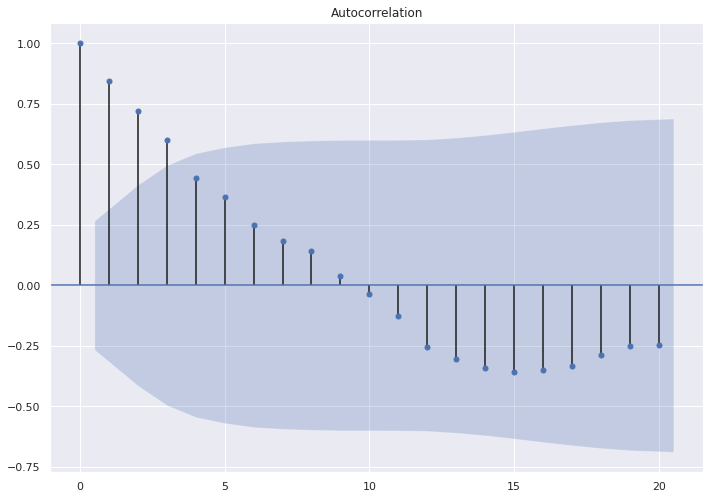

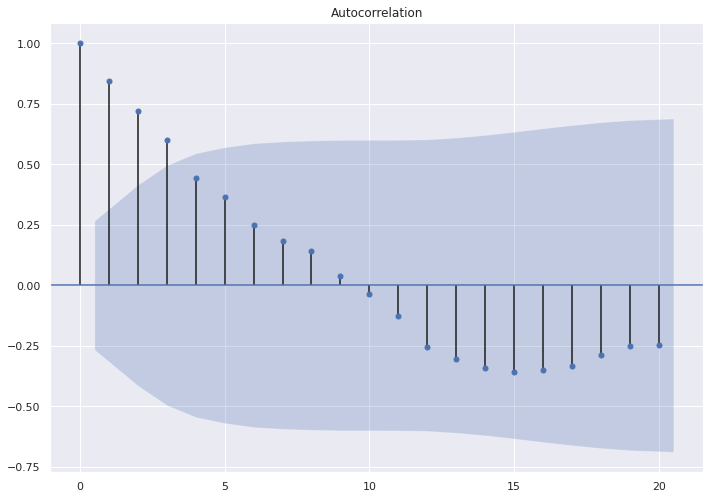

In [74]:
sm.graphics.tsa.plot_acf(metric_df['residual'].squeeze(), lags=20)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


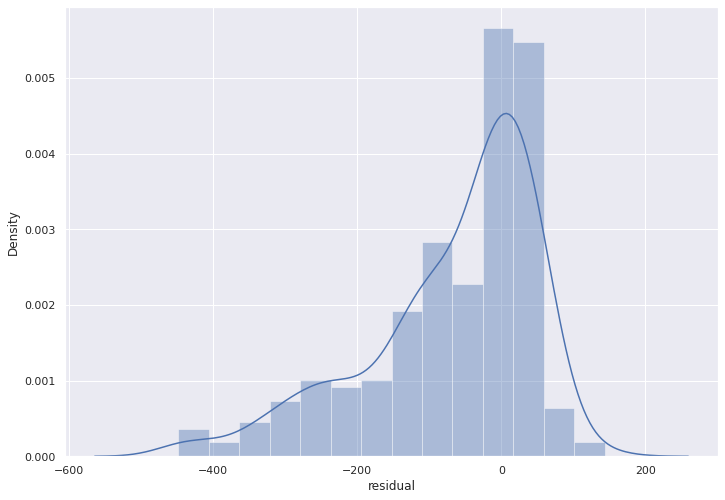

In [71]:
sns.distplot(metric_df_daily['residual'])

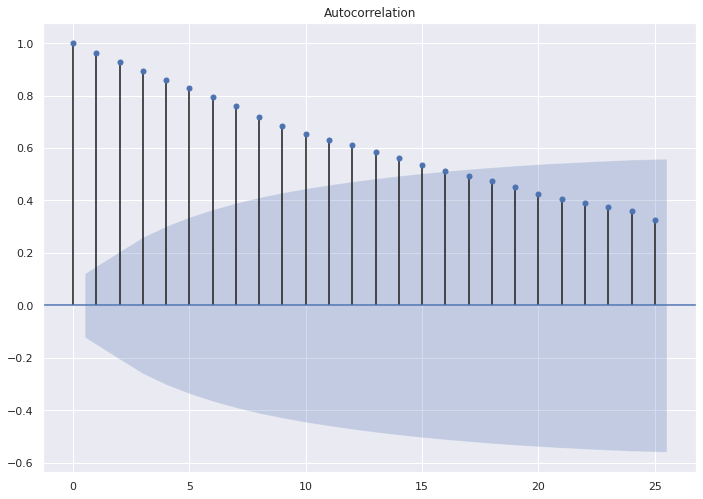

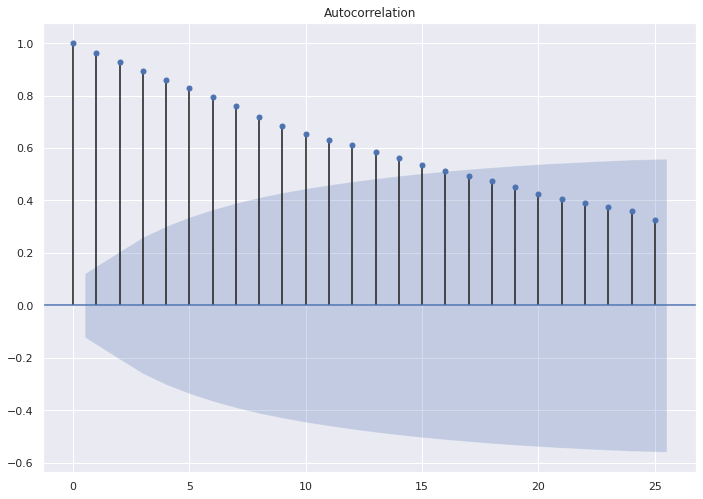

In [72]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(metric_df_daily['residual'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


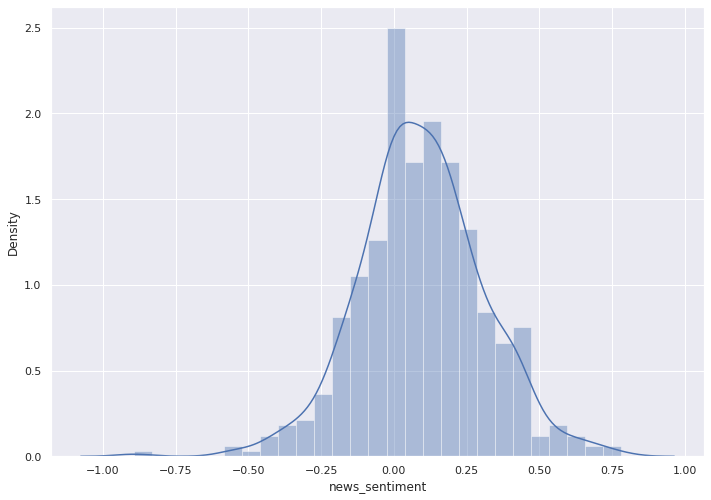

In [73]:
sns.distplot(df['news_sentiment'])